In [2]:
 import matplotlib.pyplot as plt
import numpy as np
import requests #web에 있는 data 불러오기


In [3]:
with open("example_index", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
  f.write(r.content)

with open("example_arcs", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
  f.write(r.content)

In [4]:
nodes = np.loadtxt("example_index", dtype=object)[:, 0]
num_node = nodes.shape[0]

edges = np.loadtxt("example_arcs", dtype=int)
num_edges = edges.shape[0]

print(num_node)
print(num_edges)


106
141


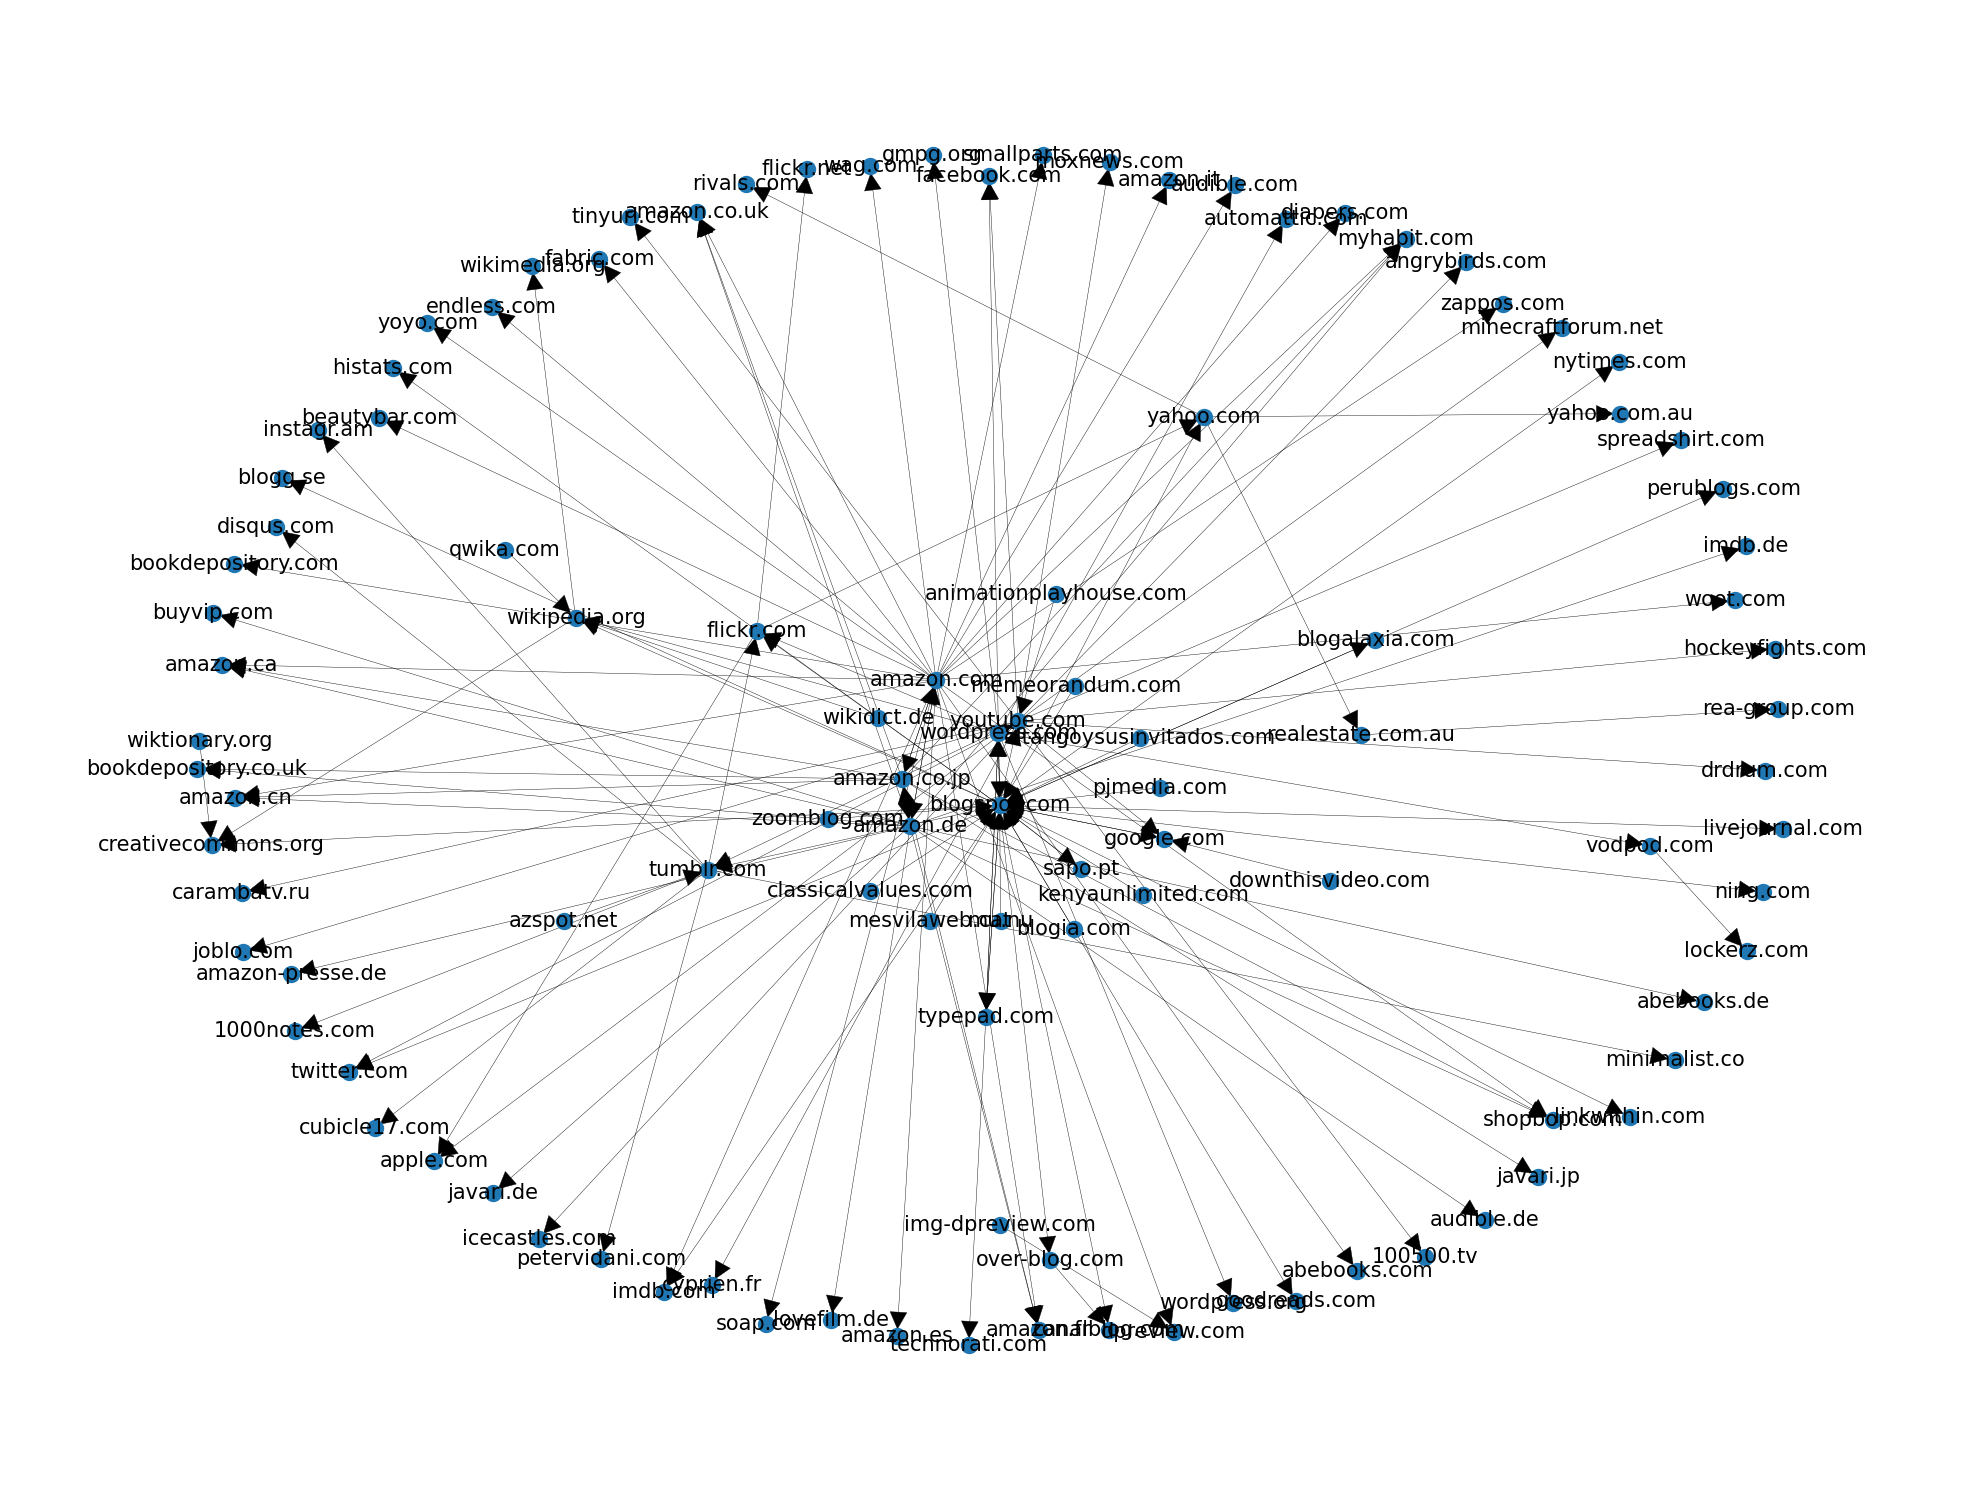

In [5]:
import networkx as nx


plt.figure(dpi=300)#해상도 변경
G = nx.DiGraph()

for e in edges:
  G.add_edge(nodes[e[0]], nodes[e[1]])


pos = nx.spring_layout(G, k=1, iterations=200)
nx.draw(G, pos, with_labels=True, node_size= 10, font_size=5, width=0.1)


In [7]:
r= nx.pagerank(G)
r = sorted(r.items(), key=lambda x: -x[1], reverse=True)

print(edges)
print(edges.shape)

[[  7   5]
 [  7   6]
 [  7   8]
 [  7   9]
 [  7  10]
 [  7  12]
 [  7  26]
 [  7  57]
 [  7  70]
 [  7  82]
 [  9   2]
 [  9   5]
 [  9   6]
 [  9   7]
 [  9   8]
 [  9  10]
 [  9  11]
 [  9  12]
 [  9  13]
 [  9  17]
 [  9  21]
 [  9  27]
 [  9  35]
 [  9  38]
 [  9  41]
 [  9  42]
 [  9  52]
 [  9  70]
 [  9  82]
 [  9  83]
 [  9  84]
 [  9  92]
 [  9  97]
 [  9 103]
 [  9 104]
 [ 10   3]
 [ 10   4]
 [ 10   5]
 [ 10   6]
 [ 10   7]
 [ 10   8]
 [ 10   9]
 [ 10  12]
 [ 10  18]
 [ 10  26]
 [ 10  28]
 [ 10  53]
 [ 10  56]
 [ 10  63]
 [ 10  70]
 [ 10  82]
 [ 15 102]
 [ 20  88]
 [ 22  25]
 [ 22  74]
 [ 24  25]
 [ 25  22]
 [ 25  23]
 [ 25  29]
 [ 25  32]
 [ 25  43]
 [ 25  44]
 [ 25  47]
 [ 25  48]
 [ 25  49]
 [ 25  52]
 [ 25  60]
 [ 25  61]
 [ 25  71]
 [ 25  72]
 [ 25  73]
 [ 25  81]
 [ 25  88]
 [ 25  89]
 [ 25  90]
 [ 25  95]
 [ 25  98]
 [ 25 100]
 [ 25 102]
 [ 31  25]
 [ 37  48]
 [ 64  25]
 [ 65  25]
 [ 69  25]
 [ 73  29]
 [ 76  25]
 [ 77  95]
 [ 79  78]
 [ 81  25]
 [ 40  25]
 [ 44  16]

In [ ]:
def pagerank(edges, n_nodes, beta=0.85, epoch=100):
  r = [1/n_nodes]* n_nodes
  d = [0]* n_nodes

  for u, _ in edges:
    d[u] += 1

  teleport = (1-beta) /n_nodes

  for _ in range(epoch):
    r_next = [teleport] * n_nodes

     #시작 노드의 점수를 끝 노드 점수에 합산
    for u, v in edges:
      r_next[v] += beta * r[u]/d[u]


    r_sum = sum(r_next)

    #정규화 dead end 처리
    for u in range(n_nodes):
      r_next[u] += (1-r_sum)/n_nodes

    r = r_next

  return r



In [ ]:
r = pagerank(edges, num_node, 0.15, 100)

for score, node in sorted(zip(r, nodes), reverse=True)[:10]:
  print(f"({score:.6f} {node})")

(0.025344 blogspot.com)
(0.011977 wikipedia.org)
(0.011385 creativecommons.org)
(0.010631 youtube.com)
(0.010586 tumblr.com)
(0.010586 google.com)
(0.010512 canalblog.com)
(0.010394 rea-group.com)
(0.010377 dpreview.com)
(0.010343 lockerz.com)
